In [1]:
import glworia.amplification_factor
import glworia.lens_functions
from glworia.amplification_factor import *
from glworia.lens_functions import *
import glworia.lens_functions
from glworia.lens_functions import *
import glworia.contour
from glworia.contour import *
import glworia.utils
from glworia.utils import *
import glworia.root
from glworia.root import *
import glworia.plot
from glworia.plot import *
import glworia.frequency_domain
from glworia.frequency_domain import *

2023-09-15 16:45:24.909920: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [2]:
from importlib import reload

In [3]:
reload(glworia.amplification_factor)
reload(glworia.lens_functions)
from glworia.amplification_factor import *
from glworia.lens_functions import *
reload(glworia.lens_functions)
from glworia.lens_functions import *
reload(glworia.contour)
from glworia.contour import *
reload(glworia.utils)
from glworia.utils import *
reload(glworia.root)
from glworia.root import *
reload(glworia.plot)
from glworia.plot import *
reload(glworia.frequency_domain)
from glworia.frequency_domain import *

In [4]:
# import matplotlib as mpl

# plt.rc('text', usetex=False)
# plt.rc('font', family='qpl')
# plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

# mpl.rcParams['xtick.major.size'] = 4
# mpl.rcParams['ytick.major.size'] = 4
# mpl.rcParams['xtick.minor.size'] = 2
# mpl.rcParams['ytick.minor.size'] = 2

# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.direction'] = 'in'
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.top'] = True
# plt.rcParams['ytick.left'] = plt.rcParams['ytick.right'] = True
# plt.rcParams['xtick.labeltop'] = plt.rcParams['ytick.labelright'] = False
# mpl.rcParams['axes.unicode_minus'] = False

# params = {'axes.labelsize': 18,
#           'font.family': 'serif',
#           'font.size': 9,
#           'legend.fontsize': 12,
#           'xtick.labelsize': 11,
#           'ytick.labelsize': 11,
#           'savefig.dpi': 200,
#           'lines.markersize': 6,
#           'axes.formatter.limits': (-3, 3)}

# mpl.rcParams.update(params)

In [5]:
from jax.config import config
config.update("jax_enable_x64", True)

In [6]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [7]:
# use tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# NFW profile

In [8]:
@jit
def Psi_NFW(x, lens_params):
    kappa = lens_params[0]
    x_norm = jnp.linalg.norm(x)
    dim_1 = jnp.ones(x.shape)
    x_safe_low = jnp.where(x_norm<1, x, 0.5*dim_1)
    x_safe_hi = jnp.where(x_norm<1, 2*dim_1, x)
    x_safe_low_norm = jnp.linalg.norm(x_safe_low)
    x_safe_hi_norm = jnp.linalg.norm(x_safe_hi)
    Psi = jnp.where(x_norm<1,
        kappa / 2 * (jnp.log(x_safe_low_norm/2)**2 - jnp.arctanh(jnp.sqrt(1-x_safe_low_norm**2))**2),
        kappa / 2 * (jnp.log(x_safe_hi_norm/2)**2 + jnp.arctan(jnp.sqrt(x_safe_hi_norm**2 - 1))**2))
    return Psi

In [9]:
# y =jnp.array([2.0, 0.])
lens_params = jnp.array([3.0])
w_interp = jnp.linspace(1e-3, 1e3, 10**6)
T0_max = 1000.

convergence_F_list_list = []
contour_obj_list_list = []

y_list = [jnp.array([0.2, 0.]), jnp.array([2.0, 0.])]
h_list = [0.04, 0.02, 0.01, 0.005]
N_list_1 = [200]

for y in y_list:
    convergence_F_list = []
    contour_obj_list = []
    for h in h_list:
        for N in N_list_1: #[100, 200, 400]:
            T_funcs, helper_funcs = amplification_computation_prep(Psi_NFW, h = h)
            crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)
            param_arr = jnp.linspace(0.1, 10., 100000)
            crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)
            crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)
            T0_max = 1000.
            F_interp, F_interp_raw, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
                        N, T0_max)
            convergence_F_list.append(F_interp)
            contour_obj_list.append(contour_obj)
    convergence_F_list_list.append(convergence_F_list)
    contour_obj_list_list.append(contour_obj_list)

0.004517777308305899 6.776665962458848
138 4.700781342890089 0.004517777308305899 6.776665962458848
79 4.693769952379971 4.666750447487322 4.734812238292856
4.693769952379971
0.004517777308305899 6.776665962458848
138 4.700781342890089 0.004517777308305899 6.776665962458848
79 4.693769952379971 4.666750447487322 4.734812238292856
4.693769952379971
0.004517777308305899 6.776665962458848
138 4.700781342890089 0.004517777308305899 6.776665962458848
79 4.693769952379971 4.666750447487322 4.734812238292856
4.693769952379971
0.004517777308305899 6.776665962458848
138 4.700781342890089 0.004517777308305899 6.776665962458848
79 4.693769952379971 4.666750447487322 4.734812238292856
4.693769952379971


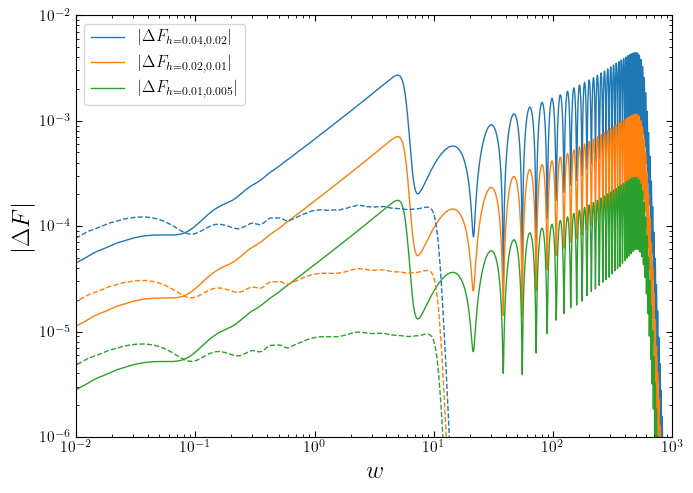

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ls = ['-', '--']
for j, convergence_F_list in enumerate(convergence_F_list_list):
    mu_min_list = [contour_obj.mu(contour_obj.x_im_min, lens_params) for contour_obj in contour_obj_list_list[j]]
    for i in range(len(convergence_F_list)-1):
        if j == 0:
            label = f'$|\Delta F_{{h = {h_list[i]}, {h_list[i + 1]}}}|$'
        else:
            label = None
        ax.loglog(w_interp, np.abs(convergence_F_list[i] - convergence_F_list[i + 1])/np.sqrt(np.abs(mu_min_list[i])), lw = 1,
                  c = f'C{i}', ls = ls[j], label = label)
ax.set_ylim(1e-6, 1e-2)
ax.set_xlim(1e-2, 1e3)
ax.legend()

ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|\Delta F|$')

plt.tight_layout()

In [11]:
convergence_F_list_list_N = []
contour_obj_list_list_N = []

N_list = [25, 50, 100, 200]

for y in y_list:
    convergence_F_list = []
    contour_obj_list = []
    for h in [0.01]:
        T_funcs, helper_funcs = amplification_computation_prep(Psi_NFW, h = h)
        crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)
        param_arr = jnp.linspace(0.1, 10., 100000)
        crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)
        crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)
        for N in N_list:
            F_interp, F_interp_raw, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
                        N, T0_max)
            convergence_F_list.append(F_interp)
            contour_obj_list.append(contour_obj)
    convergence_F_list_list_N.append(convergence_F_list)
    contour_obj_list_list_N.append(contour_obj_list)

0.004517777308305899 6.776665962458848
17 4.801456075123273 0.004517777308305899 6.776665962458848
7 4.683884058019965 4.519283234075334 5.083628916171212
4.683884058019965
0.004517777308305899 6.776665962458848
34 4.703559375167865 0.004517777308305899 6.776665962458848
23 4.6950977156279015 4.565352269348466 4.841766480987263
4.6950977156279015
0.004517777308305899 6.776665962458848
69 4.724499845746563 0.004517777308305899 6.776665962458848
27 4.693406419735771 4.65609430852282 4.792905382970306
4.693406419735771
0.004517777308305899 6.776665962458848
138 4.700781342890089 0.004517777308305899 6.776665962458848
79 4.693769952379971 4.666750447487322 4.734812238292856
4.693769952379971


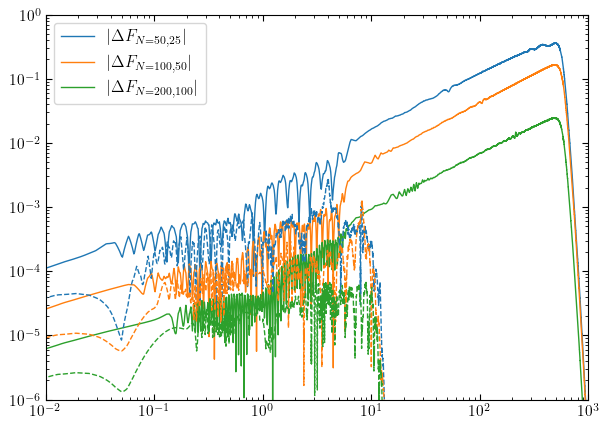

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for j, convergence_F_list in enumerate(convergence_F_list_list_N):
    mu_min_list = [contour_obj.mu(contour_obj.x_im_min, lens_params) for contour_obj in contour_obj_list_list_N[j]]
    for i in range(len(convergence_F_list)-1):
        if j == 0:
            label = f'$|\Delta F_{{N = {N_list[i + 1]}, {N_list[i]}}}|$'
        else:
            label = None
        ax.loglog(w_interp,
                  np.abs(convergence_F_list[i] - convergence_F_list[i + 1])/np.sqrt(np.abs(mu_min_list[i])), 
                  lw = 1,
                  label = label, ls = ls[j], c = f'C{i}')
ax.set_ylim(1e-6, 1)
ax.set_xlim(1e-2, 1e3)
ax.legend()

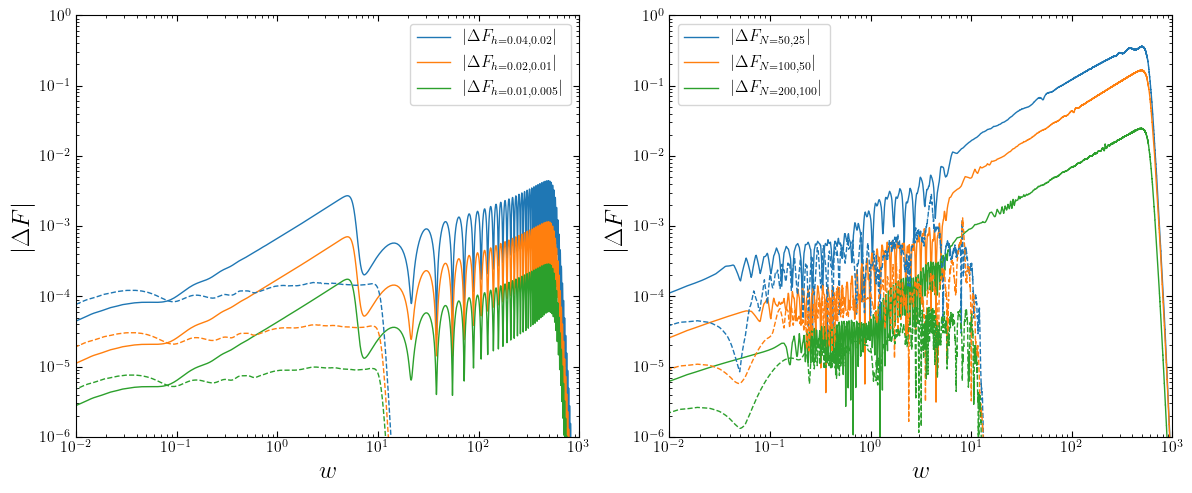

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))

ax = axs[0]

ls = ['-', '--']
for j, convergence_F_list in enumerate(convergence_F_list_list):
    mu_min_list = [contour_obj.mu(contour_obj.x_im_min, lens_params) for contour_obj in contour_obj_list_list[j]]
    for i in range(len(convergence_F_list)-1):
        if j == 0:
            label = f'$|\Delta F_{{h = {h_list[i]}, {h_list[i + 1]}}}|$'
        else:
            label = None
        ax.loglog(w_interp, np.abs(convergence_F_list[i] - convergence_F_list[i + 1])/np.sqrt(np.abs(mu_min_list[i])), lw = 1,
                  c = f'C{i}', ls = ls[j], label = label)
ax.set_ylim(1e-6, 1)
ax.set_xlim(1e-2, 1e3)
ax.legend()

ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|\Delta F|$')

ax = axs[1]

for j, convergence_F_list in enumerate(convergence_F_list_list_N):
    mu_min_list = [contour_obj.mu(contour_obj.x_im_min, lens_params) for contour_obj in contour_obj_list_list_N[j]]
    for i in range(len(convergence_F_list)-1):
        if j == 0:
            label = f'$|\Delta F_{{N = {N_list[i + 1]}, {N_list[i]}}}|$'
        else:
            label = None
        ax.loglog(w_interp,
                  np.abs(convergence_F_list[i] - convergence_F_list[i + 1])/np.sqrt(np.abs(mu_min_list[i])), 
                  lw = 1,
                  label = label, ls = ls[j], c = f'C{i}')
ax.set_ylim(1e-6, 1)
ax.set_xlim(1e-2, 1e3)
ax.legend()

ax.set_xlabel(r'$w$')
ax.set_ylabel(r'$|\Delta F|$')

plt.tight_layout()

plt.savefig('./plots/convergence.pdf', bbox_inches = 'tight')

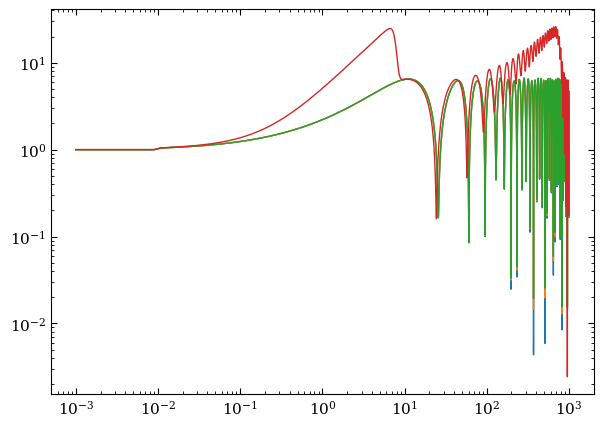

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (7, 5))
for F_interp in convergence_F_list:
    ax.loglog(w_interp, np.abs(F_interp), lw = 1)

Text(0.5, 1.0, 'NFW profile')

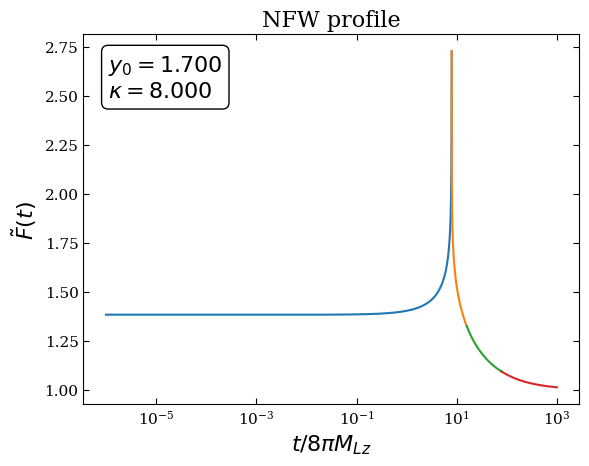

In [56]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

ax.set_title('NFW profile', fontsize = 16)


# plt.savefig(f'./plots/NFW_Ft_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#              dpi = 200, bbox_inches = 'tight')

Text(0.5, 1.0, 'NFW profile')

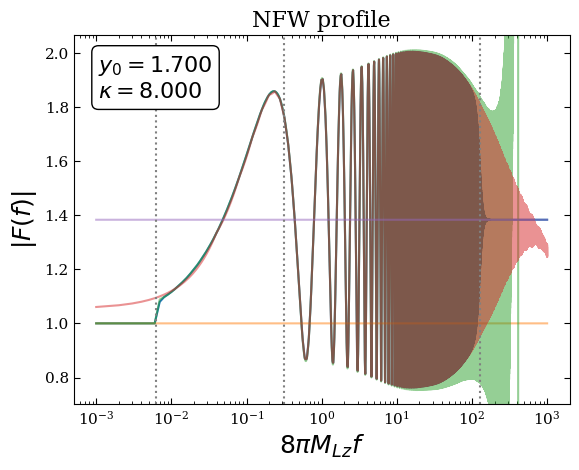

In [57]:
fig, ax = plt.subplots()

ax.semilogx(w_interp, jnp.abs(F_interp))
ax.set_xlim(*ax.get_xlim())
ax.set_ylim(*ax.get_ylim())
for F_interp_raw_i in F_interp_raw:
    ax.semilogx(w_interp, jnp.abs(F_interp_raw_i), alpha = 0.5)
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 


ax.set_title('NFW profile', fontsize = 16)


# plt.savefig(f'./plots/NFW_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
        #      dpi = 200, bbox_inches = 'tight')

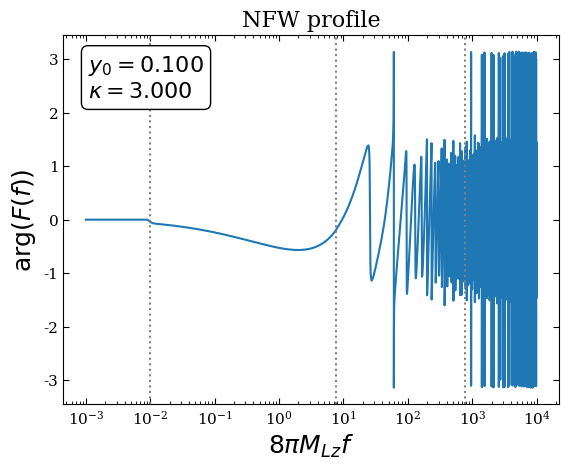

In [30]:
fig, ax = plt.subplots()

ax.semilogx(w_interp, jnp.angle(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'${\rm arg}(F(f))$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 


ax.set_title('NFW profile', fontsize = 16)


plt.savefig(f'./plots/NFW_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}_phase.png', transparent = False, facecolor = 'white',
             dpi = 200, bbox_inches = 'tight')

# Generalized SIS profile

In [10]:
@jit
def Psi_gSIS(x, lens_params):
    k = lens_params[0]
    return jnp.linalg.norm(x)**(2 - k)/(2 - k)

In [11]:
def y_crit_override_gSIS(y_crit, lens_params):
    if lens_params[0] == 1.:
        return 1.
    elif lens_params[0] > 1.:
        return jnp.inf
    else:
        return y_crit

In [12]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_gSIS)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [13]:
param_arr = jnp.linspace(0.1, 1.9, 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)
crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)

with open('./interpolation/crit_funcs/gSIS_crit_funcs_0.100_1.900.pkl', 'wb') as f:
    pickle.dump(crit_funcs_np, f)

In [44]:
N = 200
T0_max = 1000.

In [45]:
bisection_1D_var_2D = make_bisection_1D_var_2D()
bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs["dT_1D"])

# @partial(jnp.vectorize, signature = '(3),(),()->(3)')
def x_im_nan_sub_gSIS(x_im, y0, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    x_im = jax.lax.cond(jnp.isnan(x_im[0]) & (lens_params[0] > 1.), 
                        lambda x_im: x_im.at[0].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] < 1.), 
                        lambda x_im: x_im.at[1].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    return x_im

In [33]:
3.12166667, 1.09
3.20333333, 1.09

(3.20333333, 1.09)

In [34]:
y =jnp.array([3.20333333, 0.])
lens_params = jnp.array([1.09])

def origin_type_gSIS(lens_params):
    if lens_params[0] < 1.:
        origin = 'regular'
    else:
        origin = 'cusp'
    return origin

In [35]:
w_interp = jnp.linspace(1e-3, 1e4, 10**6)

In [36]:
# xs = jnp.linspace(-1.5, 1.5, 100)
# plt.plot(xs, T_funcs["dT_1D"](xs, y[0], lens_params))

In [41]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max, t_fft_long_max_fac = 5000, origin_type = origin_type_gSIS, y_crit_override = y_crit_override_gSIS,
              x_im_nan_sub = x_im_nan_sub_gSIS)

[-6.29417805e-12             nan  1.25075819e+00] [8.69697531 8.69697608 0.        ]


Text(0.05, 0.95, '$y_0 = 3.203$\n$\\kappa = 1.090$')

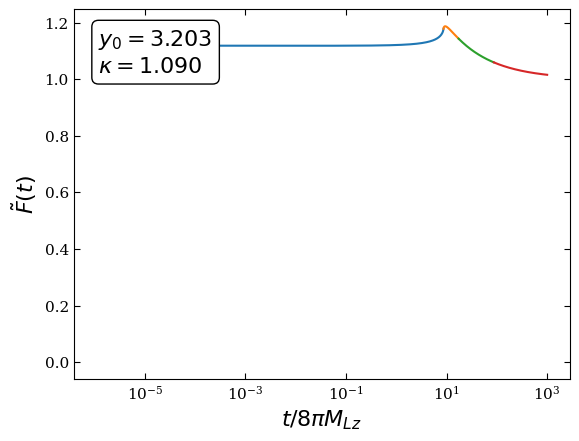

In [39]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

Text(0.5, 1.0, 'gSIS profile')

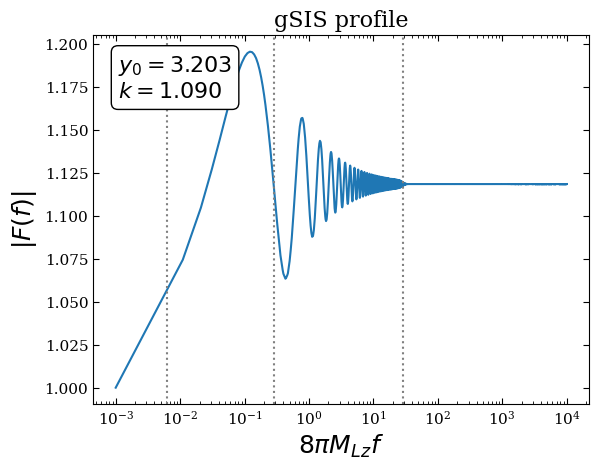

In [40]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$k = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

ax.set_title('gSIS profile', fontsize = 16)

# plt.savefig(f'./plots/gSIS_Fw_y_{y[0]:.3f}_k_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#                 dpi = 200, bbox_inches = 'tight')

# cored SIS profile

In [14]:
@jit
def Psi_CIS(x, lens_params):
    x_c = jnp.abs(lens_params[0])
    x_t = jnp.sqrt(x_c**2 + jnp.linalg.norm(x)**2)
    x_c_safe = jnp.where(x_c > 1e-15, x_c, 1e-15)
    Psi = jnp.where(x_c > 1e-15, 
            x_t + x_c_safe * jnp.log(2 * x_c_safe / (x_t + x_c_safe)), 
            x_t
                    )
    return Psi

In [15]:
def y_crit_override_CIS(y_crit, lens_params):
    if lens_params[0] < 1e-15:
        return 1.
    else:
        return y_crit

In [16]:
def origin_type_CIS(lens_params):
    if jnp.abs(lens_params[0]) > 1e-15:
        origin = 'regular'
    else:
        origin = 'cusp'
    return origin

In [17]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_CIS)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [18]:
param_arr = jnp.linspace(0., 1., 100000)
crit_funcs_np = crtical_curve_interpolants_np(param_arr, T_funcs, crit_curve_helper_funcs)

with open('./interpolation/crit_funcs/CIS_crit_funcs_0.100_1.000.pkl', 'wb') as f:
    pickle.dump(crit_funcs_np, f)

In [19]:
add_indxs = jnp.where(param_arr < 1e-15)[0]
param_arr = param_arr[param_arr >= 1e-15]
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs, add_y = jnp.array([1.]), 
                                        add_x = jnp.array([0.]), add_param = jnp.array([0.]), add_indxs = add_indxs)

In [12]:
bisection_1D_var_2D = make_bisection_1D_var_2D()
bisection_1D_cond_fun = make_bisection_1D_cond_fun(1e-13)
bisection_1D_step_fun = make_bisection_1D_step_fun(T_funcs["dT_1D"])

# @partial(jnp.vectorize, signature = '(3),(),()->(3)')
def x_im_nan_sub_CIS(x_im, y0, lens_params):
    lens_params = jnp.atleast_1d(lens_params)
    x_im = jax.lax.cond(jnp.isnan(x_im[1]) & (lens_params[0] > 0) & (y0 < 1.),
                        lambda x_im: x_im.at[1].set(
                            bisection_1D_var_2D(T_funcs["dT_1D"], 0., 
                                                -0.1, -1e-14, 
                                                bisection_1D_cond_fun, 
                                                bisection_1D_step_fun, 
                                                y0, lens_params[0])
                        ), 
                        lambda x_im: x_im, 
                        operand = x_im)
    return x_im

In [13]:
N = 200
T0_max = 1000.

In [64]:
y = jnp.array([0.1, 0.])
lens_params = jnp.array([0.5])

In [65]:
w_interp = jnp.linspace(1e-3, 1e4, 10**6)

In [66]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max, origin_type = origin_type_CIS, x_im_nan_sub = x_im_nan_sub_CIS,
            #   y_crit_override = y_crit_override_CIS
              )

overrode
0.01 100.0
0 0.01 0.01 100.0
13 0.04282417110679023 0.01 0.5124623115577889
91 0.042608473036123265 0.04029923486780636 0.045349107345774096
106 0.042610130780680565 0.04258309679251539 0.04263384927973114
55 0.04261001671862753 0.042609875743056365 0.042610385818304765
0.04261001671862753
[ 0.          0.         12.00076156] [0. 0. 0.]


Text(0.05, 0.95, '$y_0 = 0.100$\n$\\kappa = 0.500$')

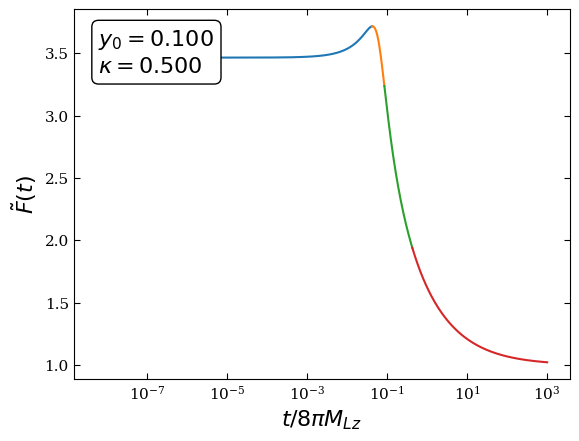

In [67]:
fig, ax = plt.subplots()

for i in range(4):
    ax.plot(contour_obj.T0_min_out_segments[i],
                contour_obj.u_min_out[i])
ax.plot(contour_obj.T0_sad_max_segment,
            contour_obj.u_sad_max)
ax.set_xscale('log')

ax.set_xlabel(r'$t/8 \pi M_{Lz}$', fontsize = 16)
ax.set_ylabel(r'$\tilde{F}(t)$', fontsize = 16)

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.)) 

Text(0.5, 1.0, 'CIS profile')

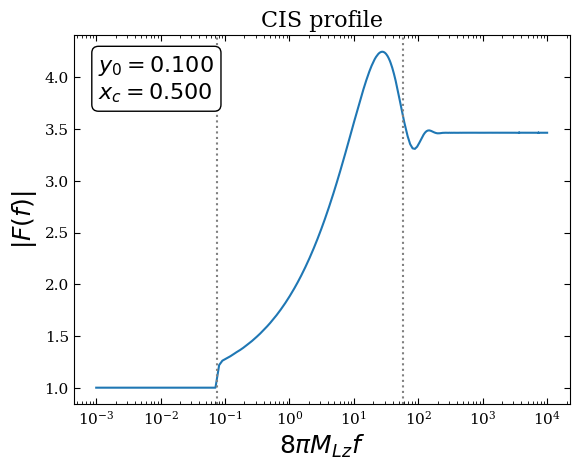

In [68]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')

ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$x_c = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.))

ax.set_title('CIS profile', fontsize = 16)

# plt.savefig(f'./plots/CIS_Fw_y_{y[0]:.3f}_xc_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
#                 dpi = 200, bbox_inches = 'tight')

# Plummer profile

In [329]:
@jit
def Psi_plummer(x, lens_params):
    kappa = lens_params[0]
    return kappa / 2 * jnp.log(1 + jnp.linalg.norm(x)**2)

In [330]:
T_funcs, helper_funcs = amplification_computation_prep(Psi_plummer)
crit_curve_helper_funcs = make_crit_curve_helper_func(T_funcs)

In [331]:
param_arr = jnp.linspace(0.1, 10., 100000)
crit_funcs = crtical_curve_interpolants(param_arr, T_funcs, crit_curve_helper_funcs)

In [332]:
N = 200
T0_max = 1000.

In [333]:
y =jnp.array([0.5, 0.])
lens_params = jnp.array([4.0])

In [337]:
w_interp = jnp.linspace(1e-3, 1e4, 10**7)

In [338]:
F_interp, contour_obj, partitions = compute_F(w_interp, y, lens_params, T_funcs, helper_funcs, crit_funcs,
              N, T0_max)

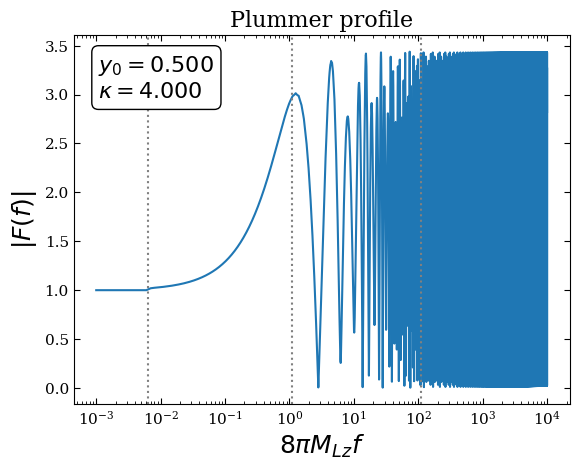

In [339]:
fig, ax = plt.subplots()
ax.semilogx(w_interp, jnp.abs(F_interp))
for partition in partitions:
    if w_interp[0] < partition < w_interp[-1]:
        ax.axvline(partition, color = 'gray', linestyle = ':')


ax.set_xlabel(r'$8 \pi M_{Lz} f$')
ax.set_ylabel(r'$|F(f)|$')

ax.text(0.05, 0.95, r'$y_0 = ' + f'{y[0]:.3f}' + r'$' + '\n' + r'$\kappa = ' + f'{lens_params[0]:.3f}' + r'$',
        transform=ax.transAxes, fontsize=16,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1.))

ax.set_title('Plummer profile', fontsize = 16)


plt.savefig(f'./plots/Plummer_Fw_y_{y[0]:.3f}_kappa_{lens_params[0]:.3f}.png', transparent = False, facecolor = 'white',
                dpi = 200, bbox_inches = 'tight')